## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
result = pd.merge(mouse_metadata, study_results)
result



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mice_num = len(mouse_metadata)
mice_num

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#noDup_mice = result.drop_duplicates(subset= "Mouse ID", keep= 'first', inplace=False)
#noDup_mice
#noDup_Time = result.drop_duplicates(subset="Timepoint", keep= 'first', inplace=False)
#noDup_Time

mice_dup = result[result.duplicated(['Mouse ID'], keep=False)]
time_dup = result[result.duplicated(['Timepoint'], keep=False)]
dup = pd.merge(mice_dup, time_dup)
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#mice_dup2 = result[result.duplicated(['Mouse ID'], keep=False)]
#mice_dup2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
noDup_mice = mice_dup.drop_duplicates(subset= "Mouse ID", keep= 'first', inplace=False)
noDup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_num2 = len(noDup_mice)
mice_num2
#uniqueD = dup['Drug Regimen'].unique()
#uniqueD


237

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med = dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
vari = dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stde = dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mean_df = pd.DataFrame(mean)
var_df = pd.DataFrame(vari)
stde_df = pd.DataFrame(stde)
sem_df = pd.DataFrame(sem)

print(mean_df)
print(med)
print(var_df)
print(stde_df)
print(sem_df)


#result3 = pd.merge(meanDF, med_numpy)
#result3
#meanDF =pd.DataFrame(mean)
#mean_numpy = np.mean(meanDF)
#med_df = pd.DataFrame(med)
#med_numpy = np.median(med_df)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.675741
Ceftamin               52.765682
Infubinol              52.884795
Ketapril               55.345698
Naftisol               54.432995
Placebo                54.083767
Propriva               52.277351
Ramicane               40.216745
Stelasyn               54.284444
Zoniferol              53.282012
Drug Regimen
Capomulin    41.557809
Ceftamin     51.910178
Infubinol    51.820584
Ketapril     53.739593
Naftisol     52.544915
Placebo      52.316010
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.488221
Zoniferol    51.826638
Name: Tumor Volume (mm3), dtype: float64
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              24.947764
Ceftamin               38.835601
Infubinol              43.128684
Ketapril               68.149888
Naftisol               65.934669
Placebo                61.051374
Propriva               42.419006
Ramicane               

In [8]:
stats_dict = {"Drug Regimen": ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"),
               "Mean": ("40.68", "52.77", "52.88", "55.35", "54.43", "54.08", "52.28", "40.22", "54.28", "53.28"), 
               "Median": ("41.56", "51.91", "51.82", "53.74", "52.54", "52.32", "50.78", "40.67", "52.49", "51.83"), 
               "Variance": ("24.95","38.84", "43.13", "68.15", "65.93", "61.05", "42.42", "23.49", "59.30", "48.42"),
              "Standard Deviation": ("4.99", "6.23", "6.57", "8.26", "8.12", "7.81", "6.51", "4.85", "7.70", "6.96"),
              "SEM": ("0.33", "0.47", "0.49", "0.61", "0.60", "0.58", "0.51", "0.32", "0.57", "0.52")}

st_df = pd.DataFrame(stats_dict)
st_df

drug_df = st_df.set_index("Drug Regimen")
drug_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.77,51.91,38.84,6.23,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.35,53.74,68.15,8.26,0.61
Naftisol,54.43,52.54,65.93,8.12,0.60
Placebo,54.08,52.32,61.05,7.81,0.58
Propriva,52.28,50.78,42.42,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.28,52.49,59.30,7.70,0.57


## Bar Plots

<IPython.core.display.Javascript object>


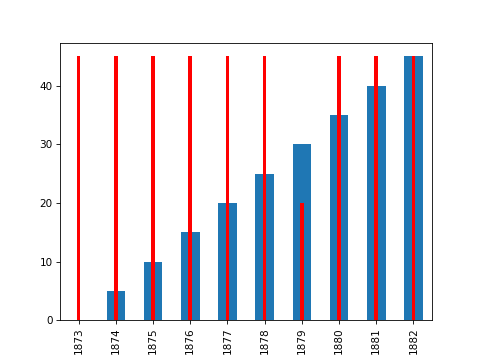

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
#plt.hist(st_df)
#plt.xlabel('Timepoint')
#plt.ylabel('Mouse ID')
#plt.show()

abc = dup.groupby('Mouse ID')['Timepoint']
efg = abc.plot(kind='bar')




In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#big square
x_axis = dup['Mouse ID']
y_axis = dup['Timepoint']
plt.bar(x_axis, y_axis, color = 'r', align="center", width=0.1)

<BarContainer object of 1883 artists>

## Pie Plots

<IPython.core.display.Javascript object>


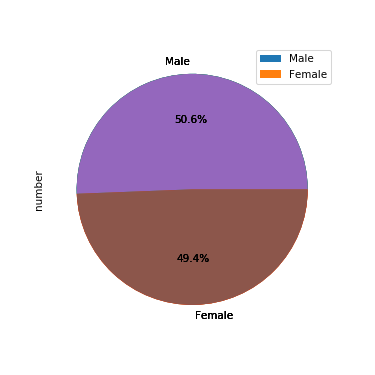

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gend_total = dup["Sex"].value_counts()
gend_total

gend_total2 = pd.DataFrame(gend_total)
gend_total2

gend_total3 = pd.DataFrame({'number': [953, 930]},
                  index=['Male', 'Female'])
plot = gend_total3.plot.pie(y='number', figsize=(5, 5))

#abc2 = dup.groupby('Sex')
#efg2 = abc2.plot(kind='pie')

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
num = [953, 930]

plt.pie(num, labels=sex, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x208d57d0f08>,
 [Text(-0.021103917636715184, 1.0997975380316065, 'Male'),
  Text(0.021103917636715538, -1.0997975380316065, 'Female')],
 [Text(-0.011511227801844643, 0.599889566199058, '50.6%'),
  Text(0.011511227801844838, -0.599889566199058, '49.4%')])

## Quartiles, Outliers and Boxplots

<IPython.core.display.Javascript object>


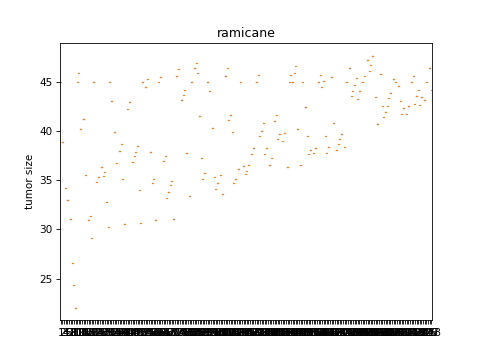

Ramicane IQR: 8.325365415000007


<IPython.core.display.Javascript object>


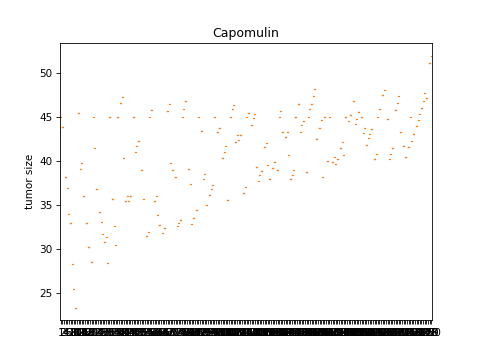

Capomulin IQR: 7.314067135000002


<IPython.core.display.Javascript object>


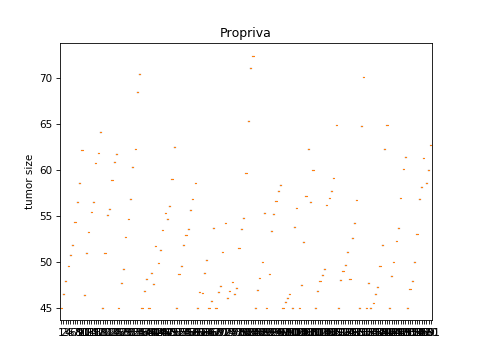

Propriva IQR: 9.648124179999996


<IPython.core.display.Javascript object>


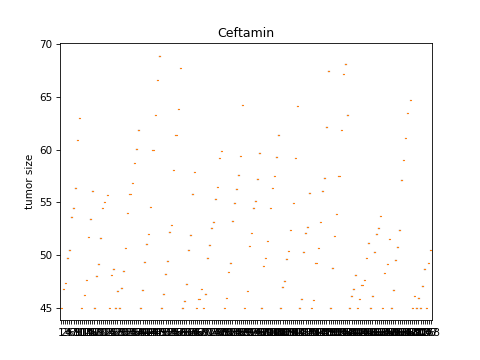

Ceftamin IQR: 9.648124179999996


In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor = dup.loc[result['Drug Regimen'] == "Ramicane", 'Tumor Volume (mm3)']
tumor2 = dup.loc[result['Drug Regimen'] == "Capomulin", 'Tumor Volume (mm3)']
tumor3 = dup.loc[result['Drug Regimen'] == "Propriva", 'Tumor Volume (mm3)']
tumor4 = dup.loc[result['Drug Regimen'] == "Ceftamin", 'Tumor Volume (mm3)']


#print(f"Ramicane {tumor}")
#print(f"Capomulin {tumor2}")
#print(f"Propriva {tumor3}")
#print(f"Ceftamin {tumor4}")

df1 = pd.DataFrame(tumor)
df2 = pd.DataFrame(tumor2)
df3 = pd.DataFrame(tumor3)
df4 = pd.DataFrame(tumor4)


fig1, ax1 = plt.subplots()
ax1.set_title('ramicane')
ax1.set_ylabel('tumor size')
ax1.boxplot(df1)
plt.show()

quartiles = tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane IQR: {iqr}")

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('tumor size')
ax1.boxplot(df2)
plt.show()

quartiles2 = tumor2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

print(f"Capomulin IQR: {iqr2}")

fig1, ax1 = plt.subplots()
ax1.set_title('Propriva')
ax1.set_ylabel('tumor size')
ax1.boxplot(df3)
plt.show()

quartiles3 = tumor3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

print(f"Propriva IQR: {iqr3}")

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('tumor size')
ax1.boxplot(df4)
plt.show()

quartiles4 = tumor4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)

print(f"Ceftamin IQR: {iqr3}")

#t.sort()




In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#result5 = pd.merge(df1, df2)
#result5

#result6 = pd.merge(df3, df4)
#result6

#top_regimens = pd.merge(result5, result6)
#top_regimens

#tumor_ind = top_regimens.set_index("Tumor Volume (mm3)")
#tumor_ind

#fig1, ax1 = plt.subplots()
#ax1.set_title('Top Regimens')
#ax1.set_ylabel('tumor size')
#ax1.boxplot(top_regimens)
#plt.show()

#quartiles = top_regimens.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#lower_bound = lowerq - (1.5*iqr)
##upper_bound = upperq + (1.5*iqr)

#print(f"Ramicane IQR: {iqr}"


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

t_v = df2['Tumor Volume (mm3)']
time = dup.loc[result['Drug Regimen'] == "Capomulin", 'Tumor Volume (mm3)']


#t_v = [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2]
#time = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]

plt.plot(t_v, time, marker="o", facecolors="red", edgecolors="black")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(t_v, time, marker="o", facecolors="red", edgecolors="black")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = noDup_mice['Tumor Volume (mm3)']
y_values = noDup_mice['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
